# Deacargar el Dataset 

In [6]:
!nvidia-smi

Mon Feb 14 02:40:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.142.00   Driver Version: 450.142.00   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:1E.0 Off |                    0 |
| N/A   25C    P0    24W / 300W |      2MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"
os.environ["PATH"]="/opt/amazon/openmpi/bin:/opt/amazon/efa/bin:/home/ec2-user/anaconda3/condabin:/home/ec2-user/.dl_binaries/bin:/usr/local/cuda/bin:/usr/libexec/gcc/x86_64-amazon-linux/4.8.5:/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin:/home/ec2-user/anaconda3/condabin:/opt/amazon/openmpi/bin:/opt/amazon/efa/bin:/home/ec2-user/anaconda3/condabin:/home/ec2-user/.dl_binaries/bin:/usr/local/cuda/bin:/usr/libexec/gcc/x86_64-amazon-linux/4.8.5:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/aws/bin:/opt/aws/bin"

In [5]:
!echo $CUDA_VISIBLE_DEVICES
!echo $PATH
!which nvcc

0,1
/opt/amazon/openmpi/bin:/opt/amazon/efa/bin:/home/ec2-user/anaconda3/condabin:/home/ec2-user/.dl_binaries/bin:/usr/local/cuda/bin:/usr/libexec/gcc/x86_64-amazon-linux/4.8.5:/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin:/home/ec2-user/anaconda3/condabin:/opt/amazon/openmpi/bin:/opt/amazon/efa/bin:/home/ec2-user/anaconda3/condabin:/home/ec2-user/.dl_binaries/bin:/usr/local/cuda/bin:/usr/libexec/gcc/x86_64-amazon-linux/4.8.5:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/aws/bin:/opt/aws/bin
/usr/local/cuda/bin/nvcc


In [ ]:
!conda install -c anaconda tensorflow-gpu

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::nbclient==0.5.2=pyhd8ed1ab_0
  - conda-forge/linux-64::matplotlib==3.3.4=py36h5fab9bb_0
  - conda-forge/noarch::qdarkstyle==2.8.1=pyhd8ed1ab_2
  - conda-forge/linux-64::scikit-image==0.16.2=py36hb3f55d8_0
  - conda-forge/linux-64::astropy==4.1=py36ha112f06_2
  - conda-forge/noarch::python-language-server==0.36.2=pyhd8ed1ab_0
  - conda-forge/linux-64::widgetsnbextension==3.5.1=py36h5fab9bb_4
  - conda-forge/noarch::flake8==3.8.4=py_0
  - conda-forge/noarch::ipywidgets==7.6.3=pyhd3deb0d_0
  - conda-forge/linux-64::bottleneck==1.3.2=py36h92226af_3
  - conda-forge/noarch::typing-extensions==3.7.4.3=0
  - conda-forge/noarch::path.py==12.5.0=0
  - conda-forge/noarch::dask==2021.2.0=pyhd8ed1ab_0
  - conda-forge/noarch::nbformat==5.1.2=pyhd8ed1ab_1
  - conda-forge/linux-64::path==15.1.2=py36h5fab9bb_0
  - conda-forge/noa

In [16]:
!pip install --upgrade pip
#!pip uninstall tensorflow-gpu -y
#!pip uninstall tensorflow -y
#!pip install  tensorflow
!pip install  tensorflow-gpu --upgrade

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
  Using cached tensorflow-2.6.2-cp36-cp36m-manylinux2010_x86_64.whl (458.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.6.2 which is incompatible.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


print (tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.6.2
Num GPUs Available:  0


In [7]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:',tf.test.gpu_device_name())
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [16]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Creando una capa de data augmentation

In [4]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

AttributeError: module 'tensorflow_core.keras.layers' has no attribute 'RandomFlip'

In [15]:
!ls ./train | wc -l

25000


# Creando y compilando una ConvNet

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs, )

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Dataloader y pre processing

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Dataset de juguete - Iterando en el dataset

### Ejemplo un dataset a partir de un numpy array

In [9]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [10]:
random_numbers.shape

(1000, 16)

In [13]:
print (random_numbers[0])

[-1.00034415 -0.87331905 -1.92196468  1.31751811  0.46313772 -0.39868209
  0.72085286 -0.23661758 -0.2751591   0.96277097  0.62075151 -1.72907632
  0.73309414 -1.01033732  0.54160016  1.63425798]


### Iterando el dataset

In [14]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


### Batching

In [15]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


### Aplicando una transformación del dataset

In [16]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


## Volviendo al dataset original

In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


# Ajustando el modelo

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 56s 880ms/step - loss: 0.7181 - accuracy: 0.4990 - val_loss: 0.6896 - val_accuracy: 0.5970
Epoch 2/30
63/63 [==============================] - 54s 864ms/step - loss: 0.6997 - accuracy: 0.5625 - val_loss: 0.6653 - val_accuracy: 0.6060
Epoch 3/30
63/63 [==============================] - 54s 865ms/step - loss: 0.6710 - accuracy: 0.6035 - val_loss: 0.6349 - val_accuracy: 0.6390
Epoch 4/30
63/63 [==============================] - 54s 864ms/step - loss: 0.6469 - accuracy: 0.6665 - val_loss: 0.6181 - val_accuracy: 0.6370
Epoch 5/30
63/63 [==============================] - 55s 874ms/step - loss: 0.6036 - accuracy: 0.6840 - val_loss: 0.6559 - val_accuracy: 0.6220
Epoch 6/30
63/63 [==============================] - 55s 866ms/step - loss: 0.5771 - accuracy: 0.7035 - val_loss: 0.5844 - val_accuracy: 0.6770
Epoch 7/30
63/63 [==============================] - 54s 852ms/step - loss: 0.5148 - accuracy: 0.7525 - val_loss: 0.5677 - val_accuracy: 0.6890

# Loss y accuracy en training

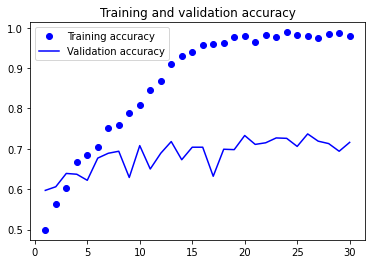

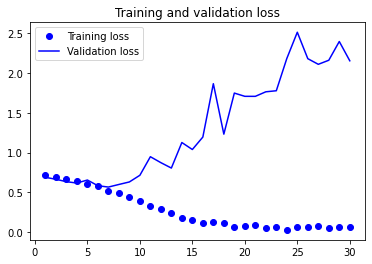

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Evauacion en el test

In [13]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 13s 198ms/step - loss: 0.5825 - accuracy: 0.7010
Test accuracy: 0.701
